<a href="https://colab.research.google.com/github/iamlekh/hotel_cancellation_prediction/blob/master/hotel_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
!pip install missingno
!pip install ggplot

In [298]:
import pandas as pd 
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


In [299]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df.to_csv('hotel.csv')

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

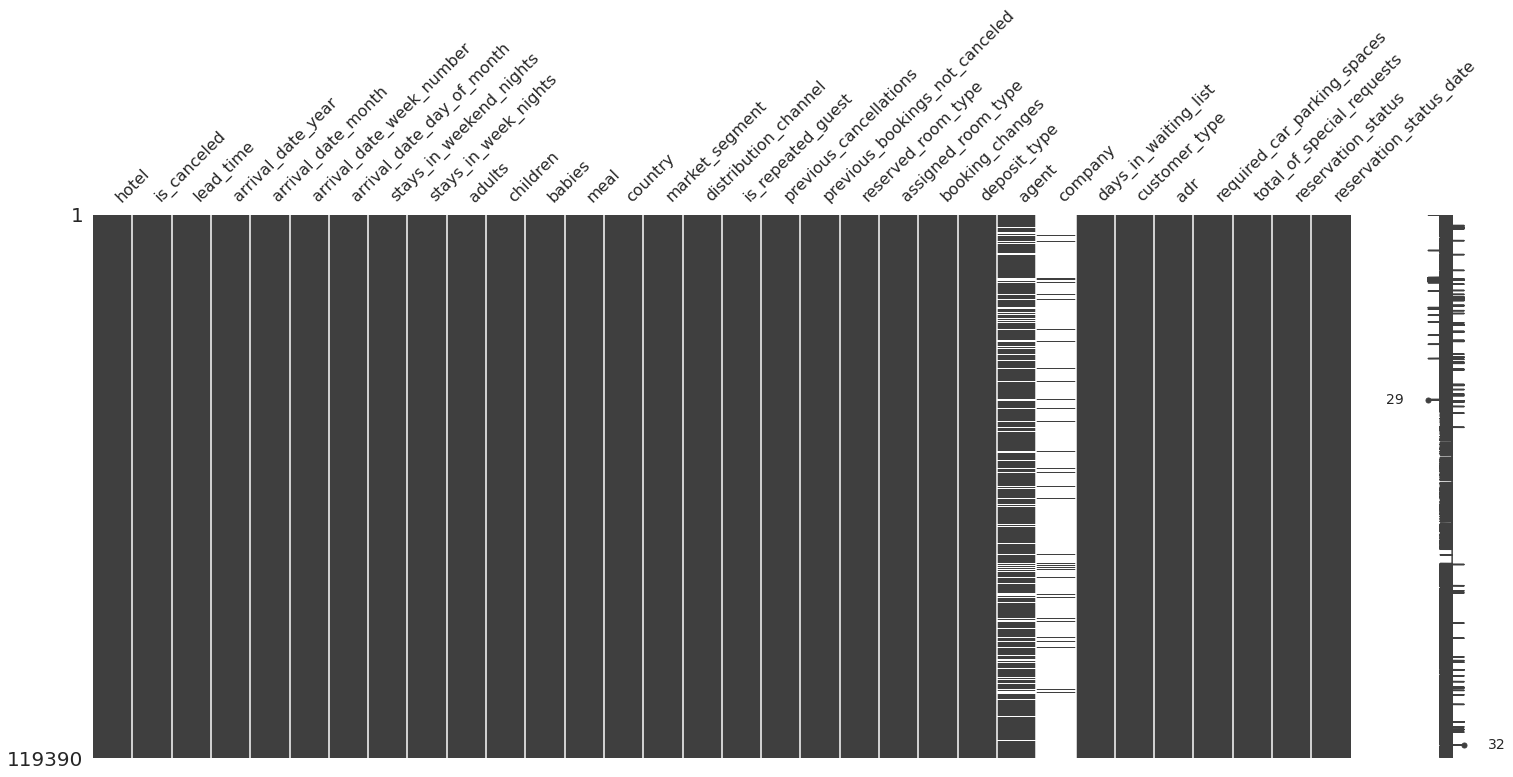

In [301]:
msno.matrix(df) 

* only company, children, agent column have missing data
* country have extra data

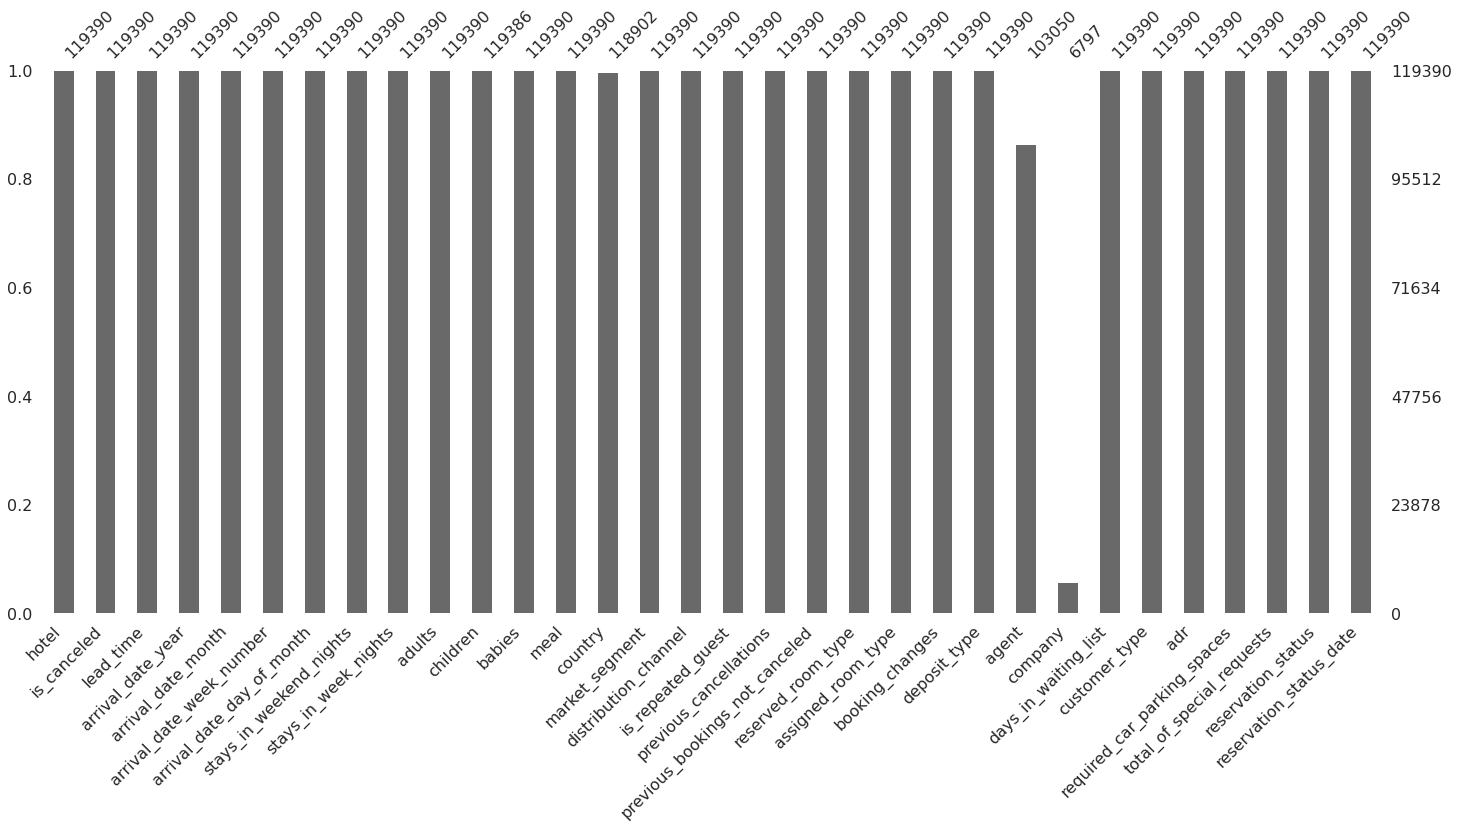

In [302]:
msno.bar(df) 

In [332]:
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,0,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,0,7,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,0,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1


In [304]:
print("The dataset have {} rows and {} columns.".format(df.shape[0],df.shape[1]))

The dataset have 119390 rows and 32 columns.


In [305]:
#drop column
df.drop(['agent','company'],axis=1, inplace=True)
#drop row
df.dropna(axis=0,how='any', inplace = True)

In [306]:
print("after cleaning the null value we have {} rows and {} columns.".format(df.shape[0],df.shape[1]))

after cleaning the null value we have 118898 rows and 30 columns.


Features that were removed:

1. hotel=This feature tended to bring the accuracy of the model down, in testing, so it was removed from the modeling data.
2. arrival_date_year=This feature does not logically make sense, as the goal is to predict future bookings cancelation status.
3. arrival_date_week_number=This feature does not logically make sense, as it too specific about the booking timeframe,there could have been local events that could have effected the bookings, or other outside factors.
this feature also tended to bring the accuracy down in testing.
4. arrival_date_day_of_month=For the same reasons above, this is too specific, yet also too broad of a feature revolved around dates.
5. reservation_status=This feature is a direct representation of whether a booking is canceled or retained, it was removed.
6. reservation_status_date=This will have no correlation to future bookings.

In [307]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,118898,118898.000000,118898.000000,118898.000000,118898,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898,118898,118898,118898,118898.000000,118898.000000,118898.000000,118898,118898,118898.000000,118898,118898.000000,118898,118898.000000,118898.000000,118898.000000,118898,118898
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,7,5,NaN,NaN,NaN,10,12,NaN,3,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79302,NaN,NaN,NaN,13852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91863,48586,56402,97730,NaN,NaN,NaN,85601,73863,NaN,104163,NaN,89174,NaN,NaN,NaN,74745,1461
mean,NaN,0.371352,104.311435,2016.157656,NaN,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,NaN,NaN,NaN,NaN,0.032011,0.087142,0.131634,NaN,NaN,0.221181,NaN,2.330754,NaN,102.003243,0.061885,0.571683,NaN,NaN
std,NaN,0.483168,106.903309,0.707459,NaN,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,NaN,NaN,NaN,NaN,0.176029,0.845869,1.484672,NaN,NaN,0.652785,NaN,17.630452,NaN,50.485862,0.244172,0.792678,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,70.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,95.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,161.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


* 'hotel' - can be remove
* 'is_canceled'- mean is 0.371352 we have to sample it (upsample/downsample) 
* 'lead_time' - min=0 max=737 mean=104 50% of the cust booked room b

* 'stays_in_weekend_nights',
* 'stays_in_week_nights'
* 'adults'- most of the
* 'children', 
'babies',
* 'meal'- have to look
* 'country'-
* 'booking_changes'- may be some outliers
* 'days_in_waiting_list'- may be some outliers
* 'adr'- outliers
      

In [308]:
df.drop(['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','reservation_status_date','reservation_status'],axis=1, inplace=True)

In [309]:
d1 = {1 :'yes', 0: 'no'}
dftemp = df.replace({"is_canceled": d1})
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}

In [310]:
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,0,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,0,7,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,0,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1


In [311]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [312]:
df.shape

(86038, 23)

In [313]:
print('# of cancel cases {} & # of not cancel cases {}'.format(df['is_canceled'][df['is_canceled']== 1].count(),df['is_canceled'][df['is_canceled']== 0].count()))

# of cancel cases 23666 & # of not cancel cases 62372


In [314]:
print('% of cancel cases {} & % of not cancel cases {}'.format(round((df['is_canceled'][df['is_canceled']== 1].count()/df.shape[0])*100,0),round((df['is_canceled'][df['is_canceled']== 0].count()/df.shape[0])*100,0)))

% of cancel cases 28.0 & % of not cancel cases 72.0


In [315]:
#graphs

In [316]:
columns = ['is_canceled',  'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

In [317]:
len(columns)


22

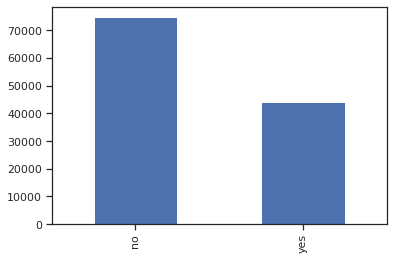

In [323]:
dftemp['is_canceled'].value_counts().plot(kind='bar')

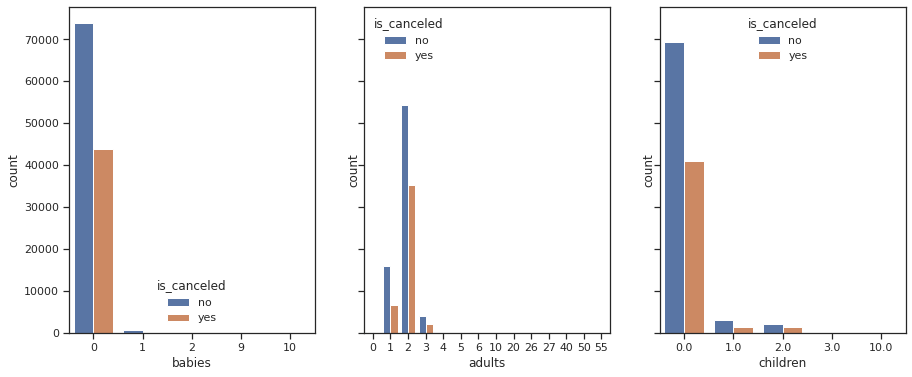

In [324]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(15,6),sharey=True)
sns.countplot(dftemp["babies"],hue=dftemp["is_canceled"], ax=ax1)
sns.countplot(dftemp["adults"], hue=dftemp["is_canceled"],ax=ax2)
sns.countplot(dftemp["children"], hue=dftemp["is_canceled"],ax=ax3)

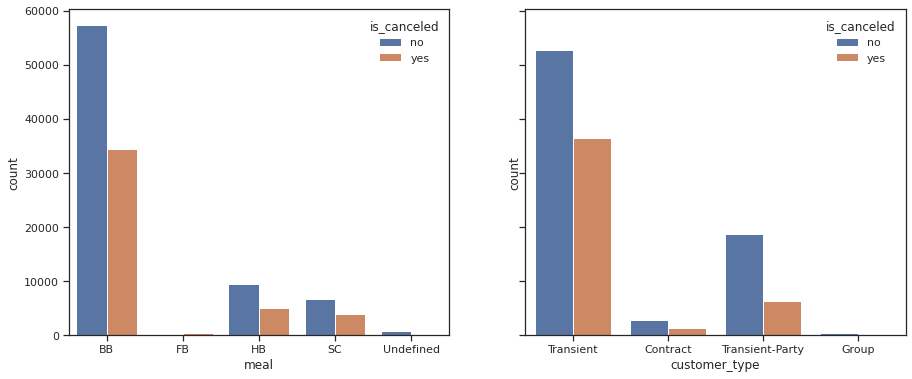

In [325]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6),sharey=True)
sns.countplot("meal",hue="is_canceled",data = dftemp, ax=ax1) 
sns.countplot("customer_type", hue="is_canceled",data = dftemp,ax=ax2)

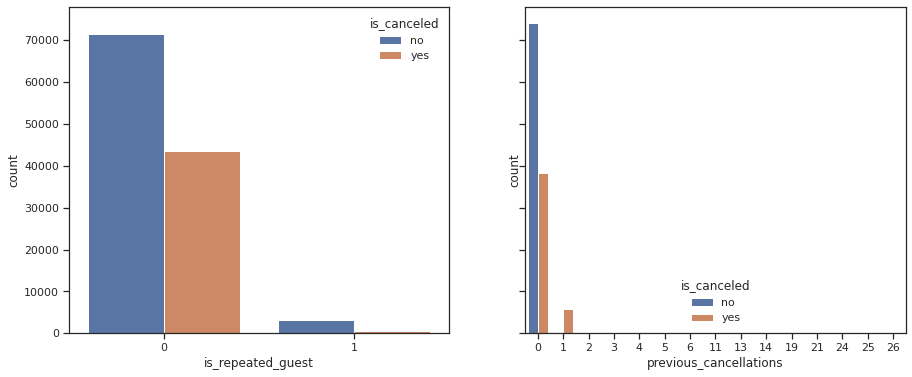

In [329]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6),sharey=True)
sns.countplot("is_repeated_guest",hue="is_canceled",data = dftemp, ax=ax1) 
sns.countplot("previous_cancellations", hue="is_canceled",data = dftemp,ax=ax2)


[None, None, None, None, None, None]

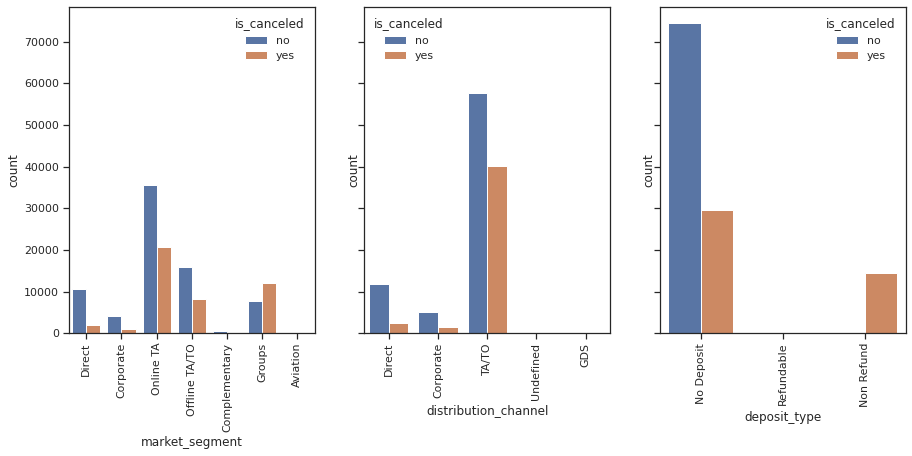

In [357]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(15,6),sharey=True)
sns.countplot(x = dftemp["market_segment"],hue=dftemp["is_canceled"], ax=ax1)
sns.countplot(x =dftemp["distribution_channel"], hue=dftemp["is_canceled"],ax=ax2)
sns.countplot(x =dftemp["deposit_type"], hue=dftemp["is_canceled"],ax=ax3)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.setp(ax3.get_xticklabels(), rotation=90)

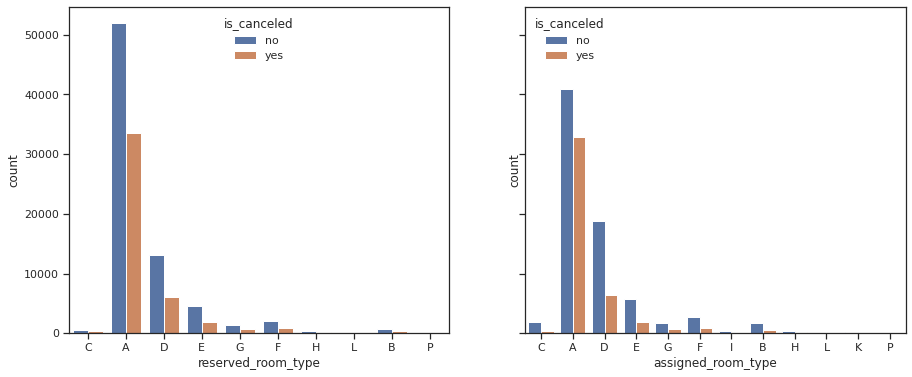

In [371]:



fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6),sharey=True)
sns.countplot("reserved_room_type",hue="is_canceled",data = dftemp, ax=ax1) 
sns.countplot("assigned_room_type", hue="is_canceled",data = dftemp,ax=ax2)


In [370]:
df['days_in_waiting_list'].value_counts().plot(kind='hexbin')

ValueError: ignored

In [ ]:
df['is_canceled'].value_counts()[0]

In [ ]:
df.head()